In [6]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot
from sklearn import preprocessing

In [12]:
# Loading the MNIST datasets - 60000 images for training and 10000 images for testing
(imageTrain, labelTrain), (imageTest, labelTest) = tf.keras.datasets.mnist.load_data()

# Splitting the training set into 2: 55000 images for training and 5000 images for validation
imageTest = imageTest[:]
labelTest = labelTest[:]

imageValid = imageTrain[55000:]
labelValid = labelTrain[55000:]

imageTrain = imageTrain[:55000]
labelTrain = labelTrain[:55000]

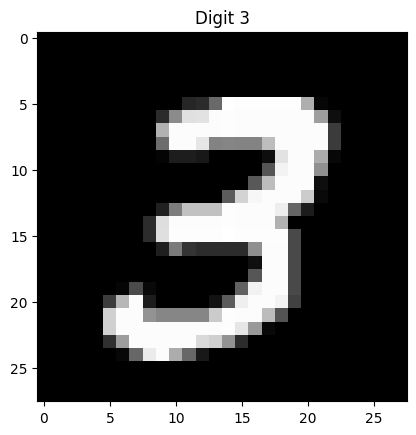

In [13]:
# Visualizing data
# Printing an array
def printArr(idx):
    to_write = ""
    for i in range(28):
        for j in range(28):
            if(len(str(imageTrain[idx][i][j])) == 1):
                to_write += str(imageTrain[idx][i][j]) + "    "
            elif(len(str(imageTrain[idx][i][j])) == 2):
                to_write += str(imageTrain[idx][i][j]) + "   "
            else:
                to_write += str(imageTrain[idx][i][j]) + "  "
        to_write += "\n"
    to_write += f"\nDigit: {labelTrain[idx]}"
    with open("./test/imageArr.txt", "w") as file:
        file.write(to_write)
        
# Plotting an image
def plotImage(idx):
    pyplot.title(f"Digit {labelTrain[idx]}")
    pyplot.imshow(imageTrain[idx], cmap='gray')
    pyplot.savefig("./test/digitGrey.jpg")

idx = 7
printArr(idx)
plotImage(idx)

In [14]:
# Preprocessing data (normalizing image arrays and 1-hot encoding label arrays)
# imageTest = np.reshape(imageTest, (10000, 784))
# imageTest = preprocessing.normalize(imageTest, norm = "max")
labelTest = tf.keras.utils.to_categorical(labelTest, num_classes=10)

# imageValid = np.reshape(imageValid, (5000, 784))
# imageValid = preprocessing.normalize(imageValid, norm = "max")
labelValid = tf.keras.utils.to_categorical(labelValid, num_classes=10)

# imageTrain = np.reshape(imageTrain, (55000, 784))
# imageTrain = preprocessing.normalize(imageTrain, norm="max")
labelTrain = tf.keras.utils.to_categorical(labelTrain, num_classes=10)

In [4]:
# Implementing a simple CNN
class CNN:
    # Model parameters
    batchSize = 0       # Size of the mini batch, if size = len(imageTrain) => full batch
    iterations = 0      # Number of iterations
    learningRate = 0    # Learning rate for gradient descent
    stride = 1          # Stride for convolutional layer
    padding = 0         # Padding for convolutional layer
    kernelDim = 3,      # Dimension of kernel = 3 x 3
    kernelNum = 5,      # Number of kernels (filters)
    inputDim = 28,      # Dimension of input images = 28 x 28
    featureDim = 26     # Dimension of feature map = inputDim + 2 * padding - kernelDim) / stride + 1 
    outputDim = 10      # Dimension of output results = 10 x 1
    sizeTest = 10000    # Size of test set
    sizeValid = 5000    # Size of validation set
    sizeTrain = 55000   # Size of training set

    # Output layer weight and bias
    # Recall: Wx + b = y
    w = np.zeros(outputDim, kernelNum * featureDim**2) # Dimension of weight is 10 x 3380 to map convolution layer (x) to output layer (y) 
    b = np.zeros(outputDim, 1)                         # Dimension of bias is 10 x 1
    
    kernel = {}
    

    def __init__(self, batchSize, iterations, learningRate):
        # Initializing batch size, iterations and learning rate
        self.batchSize, self.iterations, self.learningRate = batchSize, iterations, learningRate
        
        # Initializing random weights and biases for output layer
        self.w = np.random.randn(self.outputDim, self.kernelNum * self.featureDim**2) / np.sqrt(self.outputDim * self.kernelNum * self.featureDim**2)
        self.b = np.random.randn(self.outputDim, 1) / np.sqrt(self.outputDim)
        
        # Initializing random kernels for convolutional layer
        for i in range(self.kernelNum):
            self.kernel[i] = np.random.randn(self.kernelDim, self.kernelDim) / np.sqrt(self.kernelDim**2)
            
    def train(self, xTrain, yTrain):
        # Generating a random list of indices for the training set
        idxList = np.random.randint(low=0, high=self.sizeTrain, size=self.batchSize)

        count = 0
        lossDict = {}
        tesDict = {}

        for i in idxList:
            f_result = self.forward(xTrain[i], yTrain[i])
            b_result = self.back_propagation(X_train[i],Y_train[i],f_result)
            self.optimize(b_result, learning_rate)
            
            # if count % 100 == 0:
            #     if count % 30000 == 0:
            #         loss = self.loss(x_test,y_test)
            #         test = self.testing(x_test,y_test)
            #         print('Trained for {} times,'.format(count),'loss = {}, test = {}'.format(loss,test))
            #         # loss_dict[str(count)]=loss
            #         test_dict[str(count)]=test
            #     else:
            #         print('Trained for {} times,'.format(count))
            count += 1

        print("Training finished!")
        return lossDict, tesDict

In [197]:
# ReLU activation for hidden layer
def relu(x):
    return np.maximum(0, x)

# Softmax activation for output layer
def softmax(x):
    c = np.max(x, axis = 0, keepdims=True)
    x -= c
    e = np.exp(x)
    return e / np.sum(e, axis = 0, keepdims=True)

# Calculating loss value using cross entropy
def lossCE(yCal, yLabel, batchSize):
    result = -np.sum(np.log(yCal) * yLabel) / batchSize
    return result

def crossEntropy(batchSize, filename):
    # Initializing weights, biases and eta
    w1 = 0.01 * np.random.rand(dInput, dHidden)
    b1 = 0.01 * np.random.rand(dHidden, batchSize)
    w2 = 0.01 * np.random.rand(dHidden, dOutput)
    b2 = 0.01 * np.random.rand(dOutput, batchSize)

    lossList = []
    lossPrev = 100000
    to_write = ""
    for n in range(iter + 1):
        idxList = np.random.randint(sizeTrain, size=batchSize)
        # Feedforward
        x = imageTrain[idxList].T
        z1 = np.dot(w1.T, x) + b1
        a1 = relu(z1)
        z2 = np.dot(w2.T, a1) + b2
        a2 = softmax(z2)
        
        yCal = a2 
        yLabel = labelTrain[idxList].T
        loss = lossCE(yCal, yLabel, batchSize) 
        
        if(loss < lossPrev):
            lossPrev = loss
            w1Res = w1
            b1Res = b1
            w2Res = w2
            b2Res = b2
            # print(f"[Iter {n}] Loss: {loss}")
            to_write += f"[Iter {n}] Loss: {loss}\n"
            
        # Backpropagation
        e2 = (yCal - yLabel) / batchSize # gradient of softmax using cross entropy
        dw2 = np.dot(a1, e2.T)
        db2 = np.sum(e2, axis = 1, keepdims=True)
        e1 = np.dot(w2, e2)
        e1[z1 <= 0] = 0 # gradient of ReLU
        dw1 = np.dot(x, e1.T)
        db1 = np.sum(e1, axis = 1, keepdims=True)

        # Updating weights and biases
        w1 += -eta * dw1
        b1 += -eta * db1
        w2 += -eta * dw2
        b2 += -eta * db2
        
        if(n % 50 == 0):
            lossList.append(loss)
    
    with open(f"./test/{filename}.txt", "w") as file:
        file.write(to_write)
        
    return (w1Res, b1Res, w2Res, b2Res, lossList)

In [198]:
def checkValid(w1Res, b1Res, w2Res, b2Res, batchSize):
    if(batchSize > sizeValid):
        batchSize = sizeValid
    count = 0
    batch = 0
    while batch < sizeValid:
        idxList = np.arange(batch, batch + batchSize, 1)
        x = imageValid[idxList].T
        z1 = np.dot(w1Res.T, x) + b1Res
        a1 = relu(z1)
        z2 = np.dot(w2Res.T, a1) + b2Res
        a2 = softmax(z2)
        yLabel = labelValid[idxList]
        prediction = np.argmax(a2.T, axis=1)
        answer = np.argmax(yLabel, axis=1)
        for n in range(batchSize):
            if(prediction[n] == answer[n]):
                count += 1
        batch += batchSize
    return count / sizeValid
    
def checkTest(w1Res, b1Res, w2Res, b2Res, batchSize):
    if(batchSize > sizeTest):
        batchSize = sizeTest
    count = 0
    batch = 0
    while batch < sizeTest:
        idxList = np.arange(batch, batch + batchSize, 1)
        x = imageTest[idxList].T
        z1 = np.dot(w1Res.T, x) + b1Res
        a1 = relu(z1)
        z2 = np.dot(w2Res.T, a1) + b2Res
        a2 = softmax(z2)
        yLabel = labelTest[idxList]
        prediction = np.argmax(a2.T, axis=1)
        answer = np.argmax(yLabel, axis=1)
        for n in range(batchSize):
            if(prediction[n] == answer[n]):
                count += 1
        batch += batchSize
    return count / sizeTest

Testing on validation set: 98.04%
Testing on testing set: 97.68%


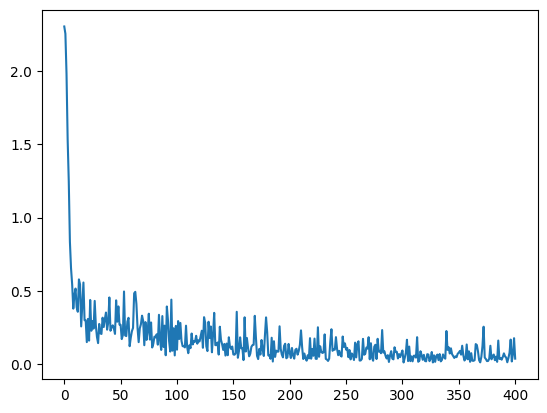

In [199]:
# Mini BGD with batch size = 50
(mini_w1Res, mini_b1Res, mini_w2Res, mini_b2Res, miniLoss) = crossEntropy(batchSize=50, filename="miniLoss")
resultValid = checkValid(mini_w1Res, mini_b1Res, mini_w2Res, mini_b2Res, batchSize=50)
print(f"Testing on validation set: {100 * resultValid}%")
resultTest = checkTest(mini_w1Res, mini_b1Res, mini_w2Res, mini_b2Res, batchSize=50)
print(f"Testing on testing set: {100 * resultTest}%")

# (mini_w1Res, mini_b1Res, mini_w2Res, mini_b2Res, miniLoss2) = crossEntropy(batchSize=25, filename="miniLoss2")
# resultValid = checkValid(mini_w1Res, mini_b1Res, mini_w2Res, mini_b2Res, batchSize=25)
# print(f"Testing on validation set: {100 * resultValid}%")
# resultTest = checkTest(mini_w1Res, mini_b1Res, mini_w2Res, mini_b2Res, batchSize=25)
# print(f"Testing on testing set: {100 * resultTest}%")

# (full_w1Res, full_b1Res, full_w2Res, full_b2Res, fullLoss) = crossEntropy(batchSize=55000, filename="fullLoss")
# resultValid(full_w1Res, full_b1Res, full_w2Res, full_b2Res, batchSize = 55000)
# resultTest(full_w1Res, full_b1Res, full_w2Res, full_b2Res, batchSize = 55000)

pyplot.plot(miniLoss)
# pyplot.plot(miniLoss2)
pyplot.show() 